# Tarea - Caminata aleatoria y simulación montecarlo

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

Hacemos la funcion

In [113]:
Desplazamiento=[-1,1] #Definimos los intervalos de desplazamientos posibles
def caminata (T,deltaT):
    Trayectoria=[0] #Camino seguido
    t=0 #Contador
    
    #Ciclo para un tiempo N
    while(t<T):
        Trayectoria.append(Trayectoria[-1] + random.choice(Desplazamiento)*(t)**0.5) #Ecuacion de movimiento
        t+=deltaT
    return Trayectoria

Graficamos

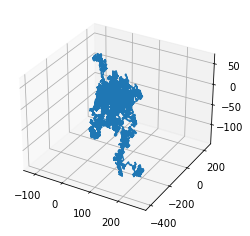

In [116]:
fig=plt.figure()
Grafica3D= fig.add_subplot(111,projection='3d') #Creamos el plano 3D
T=10
DeltaT=0.001

#Hacemos nuestros ejes
x=np.array([caminata(T,DeltaT)])
y=np.array([caminata(T,DeltaT)])
z=np.array([caminata(T,DeltaT)])

Grafica3D.plot_wireframe(x, y, z)
plt.show()

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

##### 1. Grafique la evolución del capital hasta quedar en cero.

Hacemos nuestra funcion

In [24]:
Volado=[1,0] #Definimos los resultados posibles
def apuesta (C):
    Capital=[C] #Dinero en su posesión
    while(Capital[-1] >0):
        V=random.choice(Volado) #Hacemos el volado
        
        #If para ver si ganamos o perdimos el volado
        if V==1:
            V=1
        else:
            V=-1
            
        #If para ver cuanto vamos a apostar
        if Capital[-1]>6:
            Apuesta=Capital[-1]/2
        else:
            Apuesta=2
        
        #Calculamos nuestro nuevo capital
        Capital.append(Capital[-1] + V*Apuesta) #Ecuacion de capital

    return Capital,len(Capital)-1

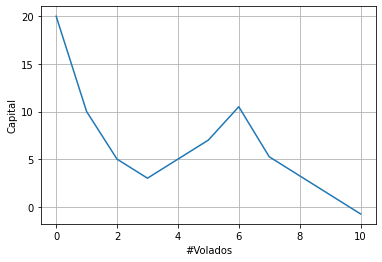

In [26]:
plt.figure()
C=20 #Capital
Juego=apuesta(C)
plt.plot(Juego[0])
plt.xlabel("#Volados")
plt.ylabel("Capital")
plt.grid()

##### 2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.

In [87]:
N=10000 #Numero de jugadores a evaluar
volados=0

#Ciclo para conocer el numero de volados promedio
for i in range(N):
    volados+=apuesta(C)[1]
    
volados_promedio=volados/N
volados_promedio

26.2649

Podemos observar que, para 10,000 apostadores, el numero de volados promedio es de 26.

Debido a la gran cantidad de jugadores evaluados podemos inferir que este valor es la media para este juego.

##### 3. Muestre un histograma del número de volados.

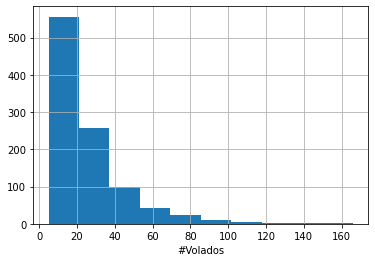

In [95]:
N=1000 #Numero de jugadores a evaluar

#Ciclo para hacer una tabla de volados
Tabla=[]
for j in range(N):
    Tabla.append(apuesta(C)[1])
    
plt.figure()
plt.hist(Tabla)
plt.xlabel("#Volados")
plt.grid()